In [79]:
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit
from qiskit_debugger import QuantumDebugCircuit, QCDebugger, run_circuit

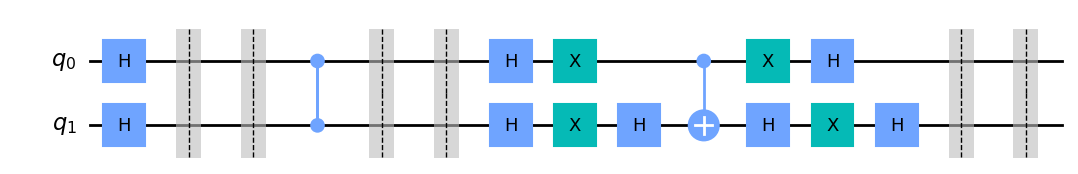

In [80]:
# Grover's algorithm with 2-qubits
# Creating function for Equal Superposition states of two qubits:
def initialize(qc):
  qc.h(0)                          # Applying H gates to both qubits
  qc.h(1)
  qc.barrier()
grover_circuit = QuantumDebugCircuit(2) # Initializing grover circuit
initialize(grover_circuit)
# adding breakpoint
grover_circuit.bp()

grover_circuit.draw('mpl')

def oracle_11(qc): 
    qc.cz(0,1)          # Apply a controlled Z gate
    qc.barrier()
oracle_11(grover_circuit)
# adding breakpoint
grover_circuit.bp()

grover_circuit.draw('mpl')

# Creating Grover's Diffusion operator:
def u_g(qc):
  qc.h(0)
  qc.h(1)
  qc.x(0)
  qc.x(1)
  qc.h(1)
  qc.cx(0,1)
  qc.x(0)
  qc.h(1)
  qc.h(0)
  qc.x(1)
  qc.h(1)
  qc.barrier()
u_g(grover_circuit)        # temporary circuit just to see what U_s looks like
# adding breakpoint
grover_circuit.bp()

grover_circuit.draw('mpl')

In [81]:
qdb = QCDebugger(grover_circuit)

In [82]:
qdb.c()
plot_histogram(qdb.counts_from_last_measurement)

breakpoints:  [0, 3, 6, 19]
     ┌───┐ ░ 
q_0: ┤ H ├─░─
     ├───┤ ░ 
q_1: ┤ H ├─░─
     └───┘ ░ 
Probability Distribution
{'00': 251, '10': 227, '11': 257, '01': 265}


breakpoints:  [3, 6, 19]
      ░     ░ 
q_0: ─░──■──░─
      ░  │  ░ 
q_1: ─░──■──░─
      ░     ░ 
Probability Distribution
{'01': 242, '11': 256, '10': 254, '00': 248}


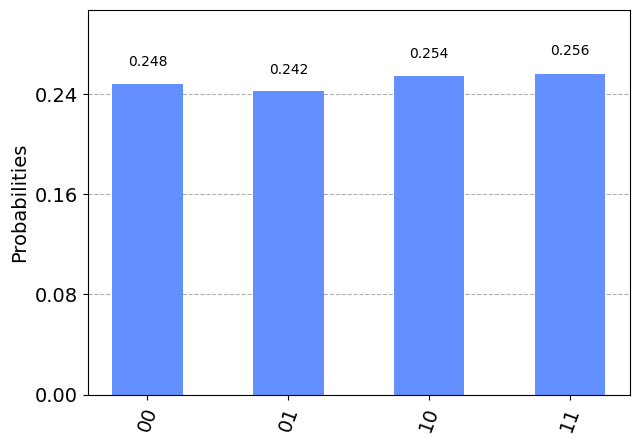

In [83]:
qdb.c()
plot_histogram(qdb.counts_from_last_measurement)

breakpoints:  [6, 19]
      ░ ┌───┐┌───┐          ┌───┐┌───┐      ░ 
q_0: ─░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─
      ░ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░ 
q_1: ─░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─
      ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░ 
Probability Distribution
{'11': 1000}


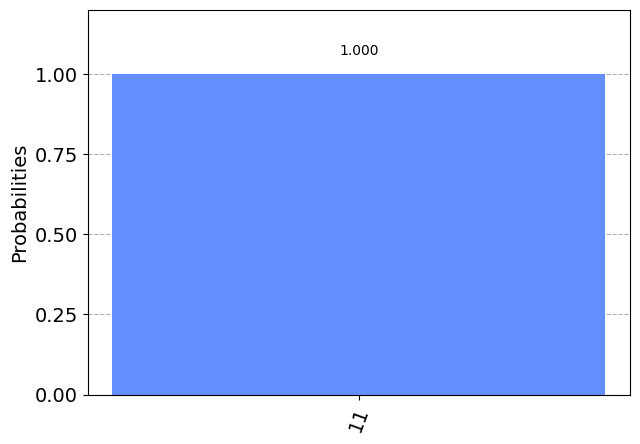

In [84]:
qdb.c()
plot_histogram(qdb.counts_from_last_measurement)

breakpoints:  [19]
      ░ 
q_0: ─░─
      ░ 
q_1: ─░─
      ░ 
Probability Distribution
{'11': 1000}


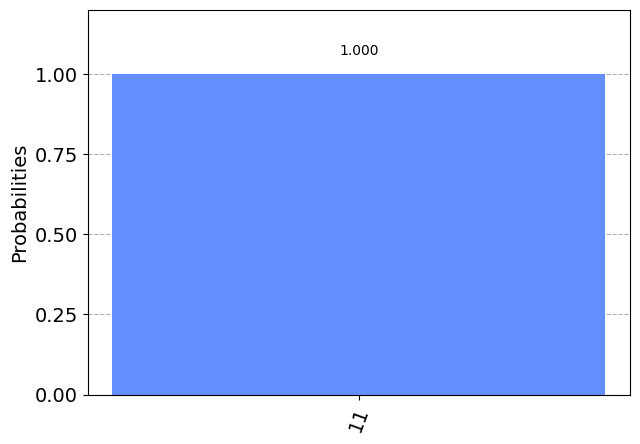

In [85]:
qdb.c()
plot_histogram(qdb.counts_from_last_measurement)

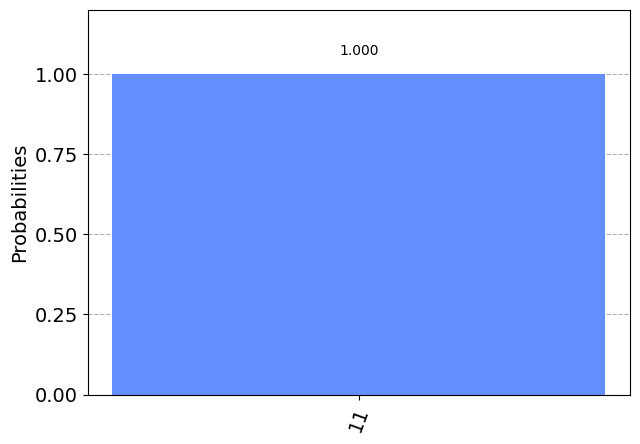

In [86]:
# Finally we measure the circuit:
# Running the circuit WITHOUT the debugger, taking the final measurement
grover_circuit.measure_all()
grover_circuit.draw('mpl')
result = run_circuit(grover_circuit)
counts = result.get_counts()
plot_histogram(counts)